In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg


In [157]:
def generate_ar1(theta, T, mean):
    ar1 = np.zeros(T)
    ar1[0] = mean
    for t in range(1, T):
        ar1[t] = theta * ar1[t - 1] + (1 - theta) * mean + np.random.normal(0, 1)
    return ar1

In [158]:
# 绘制指定范围内的AR(1)数据
def plot_ar1_data(load_data, start=0, end=10000):
    plt.figure(figsize=(10, 6))
    plt.plot(load_data[start:end])
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('AR(1) Data from {} to {}'.format(start, end))
    plt.grid(True)
    plt.show()

In [159]:
class ARExpert:
    def __init__(self, data, order=1, train_ratio=0.8, dynamic=False):
        self.data = data
        self.order = order
        self.train_ratio = train_ratio
        self.train_size = int(len(data) * train_ratio)
        self.test_size = int(len(data) - self.train_size)
        print('Train Size: {}, Test Size: {}'.format(self.train_size, self.test_size))
        self.train_data = data[:self.train_size]
        self.test_data = data[self.train_size:]
        self.model = AutoReg(self.train_data, lags=self.order, hold_back=self.order).fit()
        self.predictions = self.model.predict(start=self.train_size, end=self.train_size + self.test_size - 1, dynamic=dynamic)
        print(f'predictions.shape: {self.predictions.shape}')
        
    def plot_prediction_range(self, start, end):
        plt.figure(figsize=(10, 6))
        plt.plot(np.arange(start, end), self.data[start:end], label='True Data')
        plt.plot(np.arange(self.train_size, end), self.predictions, label='Predictions', color='red', linestyle='--')
        plt.xlabel('Time')
        plt.ylabel('Value')
        plt.title('AR({}) Predictions from {} to {}'.format(self.order, start, end))
        plt.legend()
        plt.grid(True)
        plt.show()
        
    

['50.00', '50.41', '51.58', '49.25', '48.58', '48.76', '48.98', '49.91', '51.71', '49.78', '48.86', '49.91', '51.36', '50.09', '50.08', '50.54', '51.18', '51.17', '52.09', '52.49', '51.80', '52.04', '51.28', '50.87', '51.46', '50.73', '49.96', '47.86', '50.23', '50.71', '51.10', '52.07', '52.28', '51.19', '50.26', '50.23', '49.99', '50.55', '51.17', '50.66', '49.58', '50.80', '49.19', '50.23', '47.50', '47.54', '49.16', '49.69', '48.48', '49.61', '50.00', '49.46', '49.32', '50.76', '50.54', '52.22', '50.95', '50.61', '50.73', '51.12', '49.87', '49.04', '49.51', '49.38', '51.23', '51.36', '51.95', '52.08', '51.30', '51.29', '51.13', '51.99', '52.31', '51.24', '49.95', '51.21', '48.77', '48.08', '49.04', '49.89', '48.25', '49.74', '50.96', '49.12', '48.08', '48.19', '49.26', '50.71', '49.59', '49.57', '48.54', '47.07', '48.84', '48.90', '48.70', '47.73', '48.87', '50.36', '49.97', '47.01', '48.12', '48.32', '49.35', '48.25', '49.55', '50.31', '48.42', '49.73', '48.36', '50.00', '50.33', 

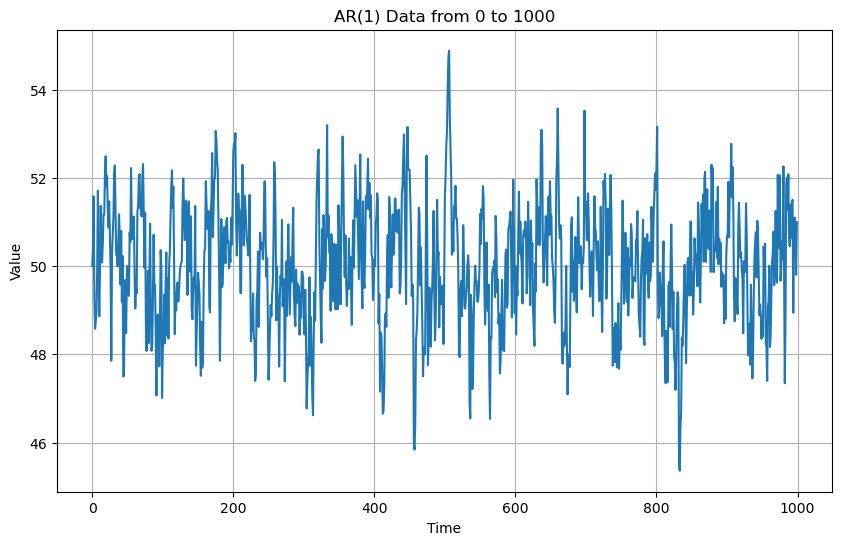

In [160]:
N = 1
T = 1000
theta = 0.7
mean = 50

load_ar1 = generate_ar1(theta, T, mean)
print([f"{x:.2f}" for x in load_ar1])

# plot_ar1_data(load_ar1, start=0, end=10000)
# plot_ar1_data(load_ar1, start=0, end=1000)
plot_ar1_data(load_ar1, start=0, end=1000)

Train Size: 800, Test Size: 200
predictions.shape: (200,)


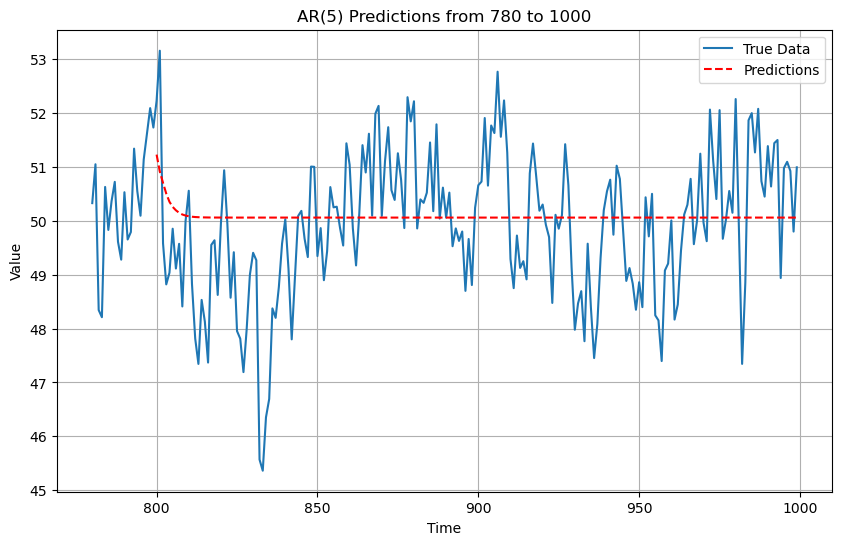

In [161]:
ar_expert = ARExpert(load_ar1, order=5, train_ratio=0.8, dynamic=True)
ar_expert.plot_prediction_range(780, 1000)

In [ ]:
ar_expert = ARExpert(load_ar1, order=5, train_ratio=0.8, dynamic=False)
ar_expert.plot_prediction_range(700, 1000)

In [148]:
class ARExpert:
    def __init__(self, data, order=1, dynamic=False):
        self.data = data
        self.order = order
        self.data_size = len(data)
        print('Data Size: {}'.format(self.data_size))
        # self.train_ratio = train_ratio
        # self.train_size = int(len(data) * train_ratio)
        # self.test_size = int(len(data) - self.train_size)
        # print('Train Size: {}, Test Size: {}'.format(self.train_size, self.test_size))
        # self.train_data = data[:self.train_size]
        # self.test_data = data[self.train_size:]
        self.model = AutoReg(self.data, lags=self.order, hold_back=self.order).fit()
        self.predictions = self.model.predict(start=self.data_size, end=self.data_size + 99, dynamic=dynamic)
        print(f'predictions.shape: {self.predictions.shape}')

    def plot_prediction_range(self):
        plt.figure(figsize=(10, 6))
        plt.plot(np.arange(900, 1000), self.data[900:1000], label='True Data')
        plt.plot(np.arange(1000, 1100), self.predictions, label='Predictions', color='red', linestyle='--')
        plt.xlabel('Time')
        plt.ylabel('Value')
        plt.title('AR({}) Predictions from {} to {}'.format(self.order, 900, 1100))
        plt.legend()
        plt.grid(True)
        plt.show()



Data Size: 1000
predictions.shape: (100,)


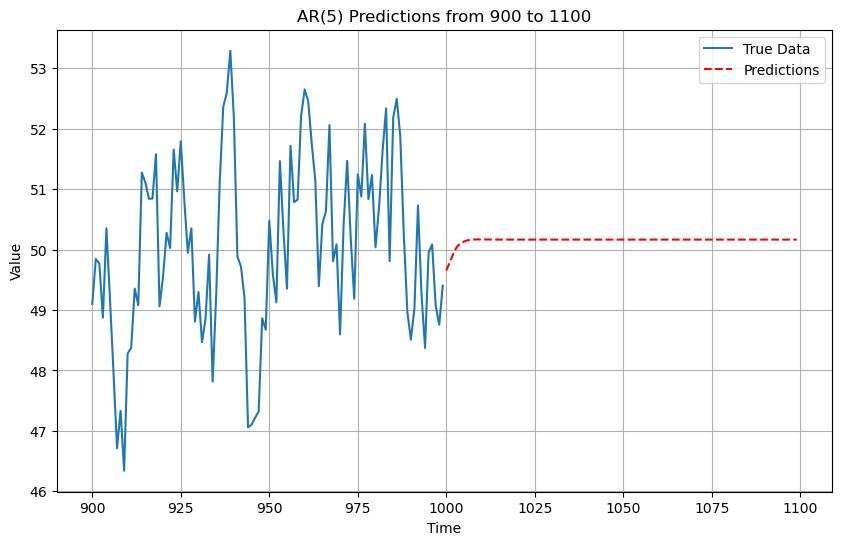

In [149]:
ar_expert = ARExpert(load_ar1, order=5, dynamic=False)
ar_expert.plot_prediction_range()

In [127]:
ar_expert.model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  800
Model:                     AutoReg(5)   Log Likelihood               -1122.592
Method:               Conditional MLE   S.D. of innovations              0.993
Date:                Fri, 09 Aug 2024   AIC                           2259.185
Time:                        07:09:56   BIC                           2291.933
Sample:                             5   HQIC                          2271.769
                                  800                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.0050      1.730      9.251      0.000      12.614      19.396
y.L1           0.7263      0.036     20.458      0.000       0.657       0.796
y.L2          -0.0843      0.044     -1.923      0.054      -0.170       0.002
y.L3           0.0481      0.044      1.094      0.274      -0.038       0.134
y.L4          -0.0169      0.044     -0.385      0.700      -0.103       0.069
y.L5           0.0081      0.035      0.228      0.820      -0.061       0.078
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4505           -0.0000j            1.4505           -0.0000
AR.2           -1.6824           -2.4572j            2.9779           -0.3456
AR.3           -1.6824           +2.4572j            2.9779            0.3456
AR.4            1.9999           -2.3681j            3.0996           -0.1384
AR.5            1.9999           +2.3681j            3.0996            0.1384
-----------------------------------------------------------------------------
"""

In [128]:
ar_expert.model.params

array([ 1.60049893e+01,  7.26315222e-01, -8.43333442e-02,  4.80535579e-02,
       -1.68755733e-02,  8.09179597e-03])

In [169]:
import numpy as np
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg


In [170]:
np.random.seed(42)
data = np.sin(np.linspace(0, 100, 11000)) + np.random.normal(0, 0.5, 11000)


In [171]:
# 使用前10000个数据训练模型
model = AutoReg(data[:10000], lags=1)
model_fitted = model.fit()

# 获取模型的参数
params = model_fitted.params


In [174]:
# 初始化一个空列表来保存预测误差
errors = []

# 初始化当前输入数据
current_input = data[10000]

# 逐步预测并计算误差
for i in range(10000, 11000-1):
    # 预测下一个值
    prediction = params[0] + params[1] * current_input

    # 计算预测误差
    error = prediction - data[i + 1]
    errors.append(error)

    # 更新当前输入为真实的下一个值
    current_input = data[i + 1]

# 转换为numpy数组
errors = np.array(errors)


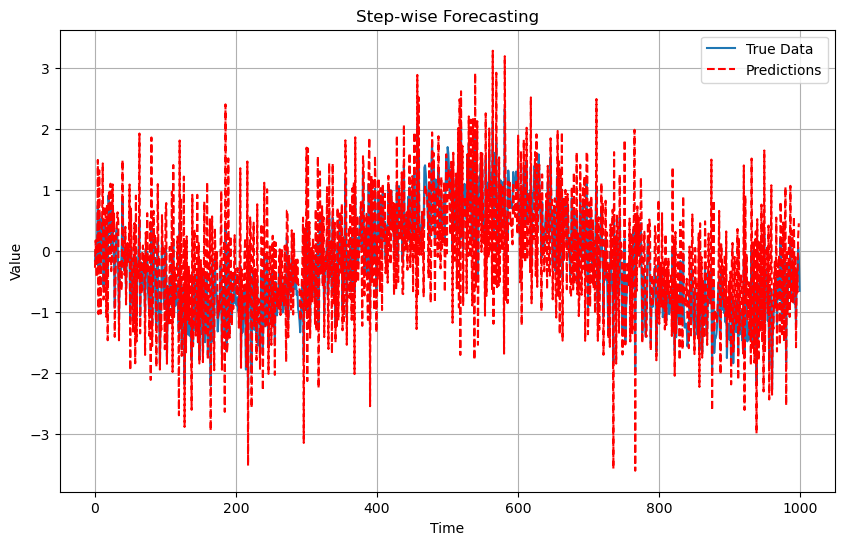

In [176]:
# 绘制真实值与预测值
plt.figure(figsize=(10, 6))
plt.plot(data[10000:11000], label='True Data')
plt.plot(data[10000:10999] + errors, label='Predictions', color='red', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Step-wise Forecasting')
plt.legend()
plt.grid(True)
plt.show()

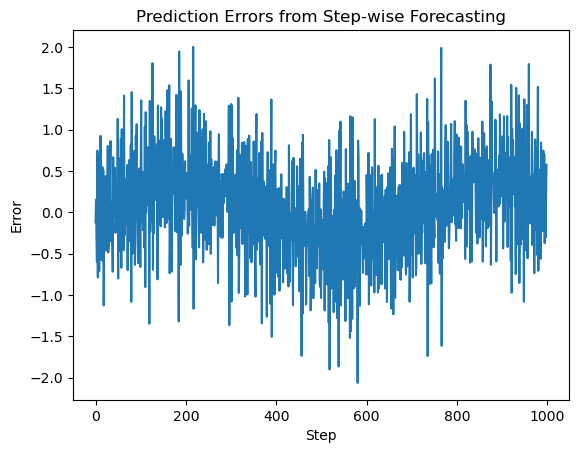

Mean Absolute Error: 0.5043476361044471


In [175]:
import matplotlib.pyplot as plt

# 绘制预测误差
plt.plot(errors)
plt.title("Prediction Errors from Step-wise Forecasting")
plt.xlabel("Step")
plt.ylabel("Error")
plt.show()

# 打印平均误差
mean_error = np.mean(np.abs(errors))
print(f"Mean Absolute Error: {mean_error}")
